In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from keras.regularizers import l2
from keras.initializers import he_normal
from keras.datasets import cifar10

import tensorflow as tf
from keras.callbacks import LearningRateScheduler

print(f"Tensorflow {tf.__version__}")

2025-12-12 10:53:36.412585: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-12 10:53:36.446250: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-12 10:53:37.315075: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-12 10:53:40.812650: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Tensorflow 2.20.0


In [2]:
def resnet_v1_eembc():
    
    inputs = tf.keras.Input(shape = (32, 32, 3))
    x = tf.keras.layers.Conv2D(
        16, 
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(
        64,
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(
        64,
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(
        10,
        activation='softmax',
        use_bias=False)(x)

    # Create functional model
    model= tf.keras.Model(inputs, x)
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

    # Loss function
    model.compile(
        loss='categorical_crossentropy', # loss function
        optimizer=optimizer, # learning rule
        metrics=['accuracy'] # show accuracy
    )
    print(model.summary())

    return model

In [3]:
# Download data
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Normalize inputs
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# One-hot output vectors
train_labels_onehot = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_onehot = tf.keras.utils.to_categorical(test_labels, 10)

In [4]:
model = resnet_v1_eembc()

# Train model (use one-hot labels)
history = model.fit(
    train_data, train_labels_onehot,       # training data (one-hot labels)
    batch_size=128,                        # batch size
    epochs=100,                            # Maximum number of epochs
    validation_split=0.1,                  # Percentage of training data used for validation
)

# Test model: get class predictions and evaluate with one-hot labels
predictions_keras = np.argmax(model.predict(test_data, verbose=0), axis=1)
test_loss, test_accuracy = model.evaluate(test_data, test_labels_onehot, verbose=0)
print(f"Test accuracy: {test_accuracy}")
model.save("CIFAR_v7.keras")

2025-12-12 10:54:07.072606: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │       102,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        10,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,440 (544.69 KB)

 Trainable params: 139,440 (544.69 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.1772 - loss: 2.2387 - val_accuracy: 0.2638 - val_loss: 2.0705
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.2723 - loss: 2.0142 - val_accuracy: 0.3122 - val_loss: 1.9259
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.3269 - loss: 1.8840 - val_accuracy: 0.3646 - val_loss: 1.8003
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - accuracy: 0.3681 - loss: 1.7713 - val_accuracy: 0.3842 - val_loss: 1.7140
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.4012 - loss: 1.6739 - val_accuracy: 0.4162 - val_loss: 1.6349
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - accuracy: 0.4291 - loss: 1.6027 - val_accuracy: 0.4526 - val_loss: 1.5434
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.4481 - loss: 1.5445 - val_accuracy: 0.4718 - val_loss: 1.4781
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.4670 - lo

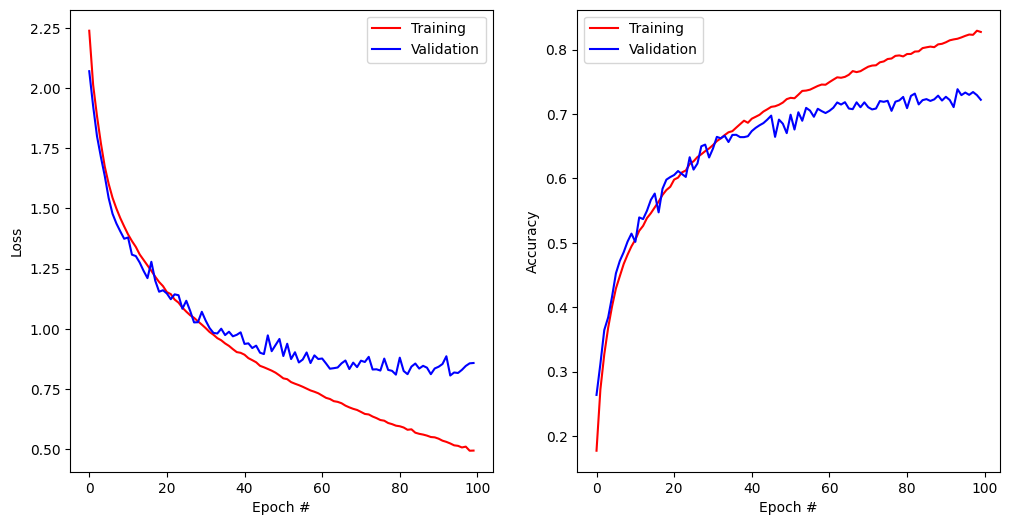

In [5]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [8]:
import ANNarchy
from ANNarchy.extensions.ann_to_snn_conversion import ANNtoSNNConverter
ANNarchy.clear()
snn_converter = ANNtoSNNConverter(
    input_encoding='IB', 
    hidden_neuron='IaF',
    read_out='spike_count',
)


ANNarchy 4.8 (4.8.2.5) on linux (posix).


In [9]:
net = snn_converter.load_keras_model("CIFAR_v7.keras", show_info=True)

* Input layer: input_layer, (32, 32, 3)
* InputLayer skipped.
* Conv2D layer: conv2d, (32, 32, 16) 
* MaxPooling2D layer: max_pooling2d, (16, 16, 16) 
* Conv2D layer: conv2d_1, (16, 16, 64) 
* MaxPooling2D layer: max_pooling2d_1, (8, 8, 64) 
* Conv2D layer: conv2d_2, (8, 8, 64) 
* MaxPooling2D layer: max_pooling2d_2, (4, 4, 64) 
* Dropout skipped.
* Flatten skipped.
* Dense layer: dense, 10 
    weights: (10, 1024)
    mean -0.00023299898020923138, std 0.07843836396932602
    min -0.27876904606819153, max 0.32511067390441895



In [10]:
predictions_snn = snn_converter.predict(test_data[:300], duration_per_sample=200)

100%|██████████| 300/300 [18:41<00:00,  3.74s/it]


In [11]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

print(classification_report(test_labels[:300], predictions_snn))
print("Test accuracy of the SNN:", accuracy_score(test_labels[:300], predictions_snn))

              precision    recall  f1-score   support

           0       0.59      0.64      0.61        36
           1       0.80      0.83      0.82        24
           2       0.57      0.44      0.50        27
           3       0.50      0.52      0.51        29
           4       0.41      0.48      0.44        23
           5       0.39      0.46      0.43        28
           6       0.74      0.68      0.71        34
           7       0.80      0.59      0.68        27
           8       0.66      0.73      0.69        37
           9       0.85      0.80      0.82        35

    accuracy                           0.63       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.64      0.63      0.63       300

Test accuracy of the SNN: 0.6266666666666667


In [12]:
model = tf.keras.models.load_model('CIFAR_v7.keras')
loss, accuracy = model.evaluate(test_data, test_labels_onehot, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7160 - loss: 0.8520


In [13]:
print(f"Test accuracy of the ANN: {accuracy:.4f}")
print("Test accuracy of the SNN:", accuracy_score(test_labels[:300], predictions_snn))

Test accuracy of the ANN: 0.7160
Test accuracy of the SNN: 0.6266666666666667
